# 1. Import and warehouse data:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [2]:
dfN = pd.read_csv('Part1 - Normal.csv')
dfH = pd.read_csv('Part1 - Type_H.csv')
dfS = pd.read_csv('Part1 - Type_S.csv')

In [3]:
dfN.shape

(100, 7)

In [4]:
dfH.shape

(60, 7)

In [5]:
dfS.shape

(150, 7)

In [6]:
dfN.isnull().any()

P_incidence    False
P_tilt         False
L_angle        False
S_slope        False
P_radius       False
S_Degree       False
Class          False
dtype: bool

In [7]:
dfH.isnull().any()

P_incidence    False
P_tilt         False
L_angle        False
S_slope        False
P_radius       False
S_Degree       False
Class          False
dtype: bool

In [8]:
dfS.isnull().any()

P_incidence    False
P_tilt         False
L_angle        False
S_slope        False
P_radius       False
S_Degree       False
Class          False
dtype: bool

In [9]:
frames = [dfN, dfH, dfS]

In [10]:
df = pd.concat(frames)

In [11]:
df.shape

(310, 7)

In [12]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


# 2. Data cleansing:

In [13]:
df.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,133
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [15]:
df['P_incidence'] = df['P_incidence'].astype('float32')
df['P_tilt'] = df['P_tilt'].astype('float32')
df['L_angle'] = df['L_angle'].astype('float32')
df['S_slope'] = df['S_slope'].astype('float32')
df['P_radius'] = df['P_radius'].astype('float32')
df['S_Degree'] = df['S_Degree'].astype('float32')

In [16]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505272,16.964296,35.112816,21.540976,127.632874,7.986683,Normal
1,54.920856,18.968430,51.601456,35.952427,125.846649,2.001642,Normal
2,44.362492,8.945435,46.902096,35.417057,129.220688,4.994195,Normal
3,48.318932,17.452122,48.000000,30.866810,128.980301,-0.910941,Normal
4,45.701790,10.659860,42.577847,35.041931,130.178314,-3.388910,Normal


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float32
 1   P_tilt       310 non-null    float32
 2   L_angle      310 non-null    float32
 3   S_slope      310 non-null    float32
 4   P_radius     310 non-null    float32
 5   S_Degree     310 non-null    float32
 6   Class        310 non-null    object 
dtypes: float32(6), object(1)
memory usage: 12.1+ KB


In [18]:
df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

## Looks like  (type_h and Type_H), (Normal and Nrmal) and (Type_S and tp_s) are same categories. Lets replace them

In [19]:
df['Class'] = df['Class'].replace('type_h','Type_H')
df['Class'] = df['Class'].replace('Nrmal','Normal')
df['Class'] = df['Class'].replace('tp_s','Type_S')

In [20]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

# 3.Data Analysis & Visulaization

In [21]:
df.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496662,17.542820,51.930931,42.953827,117.920654,26.296692,NaN
std,17.236521,10.008330,18.554064,13.423102,13.317377,37.559029,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082573,-11.058179,NaN
25%,46.430293,10.667069,37.000000,33.347121,110.709200,1.603727,NaN
50%,58.691038,16.357689,49.562399,42.404913,118.268181,11.767934,NaN
75%,72.877695,22.120394,63.000000,52.695888,125.467672,41.287353,NaN


P_incidence: Mean and Median almost equal and also suggest normal distribution. 129 is max which can be an outlier.

P_tilt: Mean and median are nearly equal. Distribution might be normal. 50 % of values are less than 16.4 but maximum value is 49.4 so curve might be little right skewed

L_angle: Mean and Median are nearly equal. There is no deviation. There might be few outliers because of the maximum value is 125
 
S_slope: Mean and Median are nearly equal. 75% of values are lesser than 52.69 but maximum value is 121. So it can be an outlier.

P_radius: Distribution feels normal.

S_Degree: Mean 26.29 is greater than Median 11.77 so there might be right skewness in the data .

We can see 50% of values are less than 11 but maximum value is 418 so there is obvious outliers in the data.

# Univariate Analysis

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


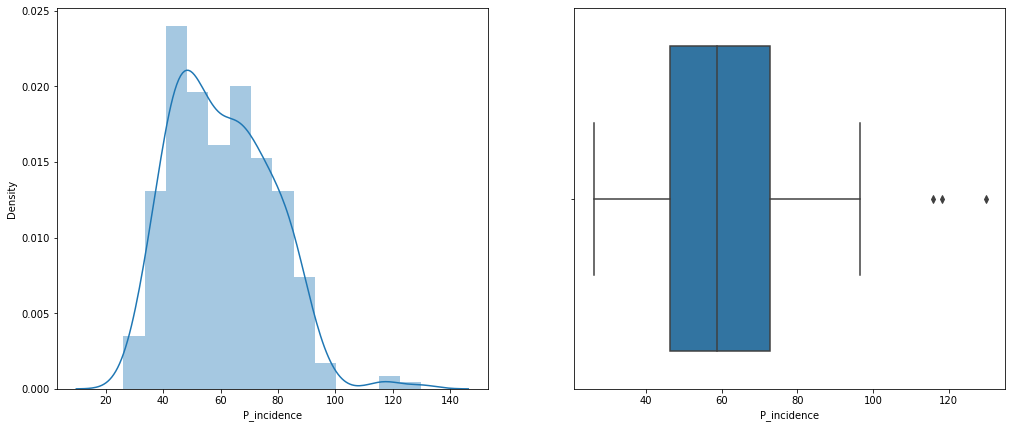

In [38]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_incidence', data=df , ax=axes[1])
sns.distplot(df['P_incidence'],  ax=axes[0])
plt.show()

It seems there are 3 outliers. Overall normality maintained, little right skewed.

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


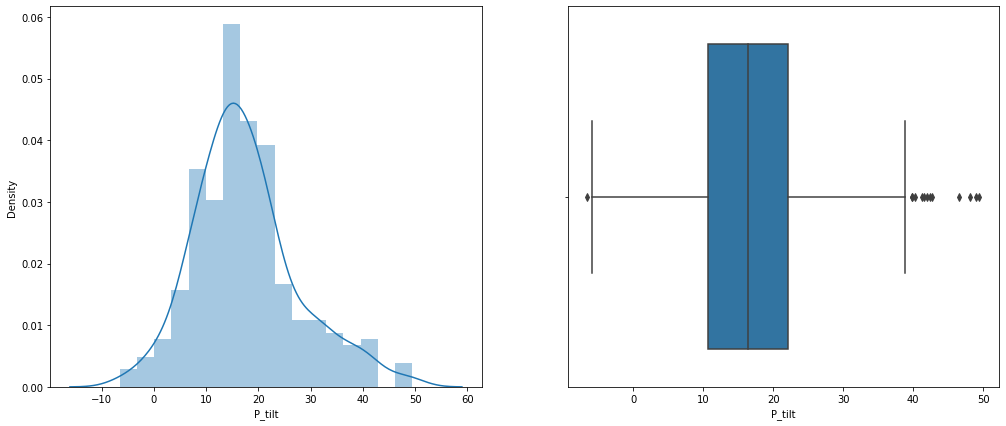

In [39]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_tilt', data=df, ax=axes[1])
sns.distplot(df['P_tilt'],  ax=axes[0])
plt.show()

There are multiple outliers. Seems normally distributed

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


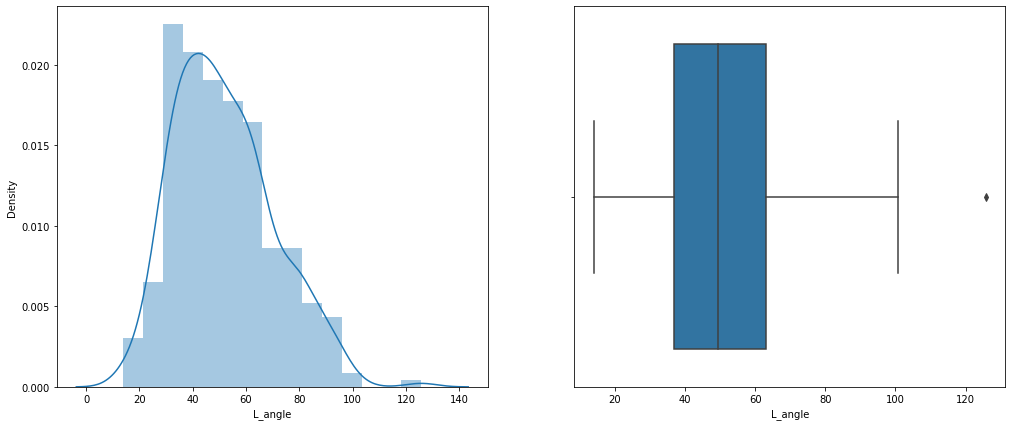

In [40]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'L_angle', data=df, ax=axes[1])
sns.distplot(df['L_angle'],  ax=axes[0])
plt.show()

One outlier is observed. Right skewness is observed

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


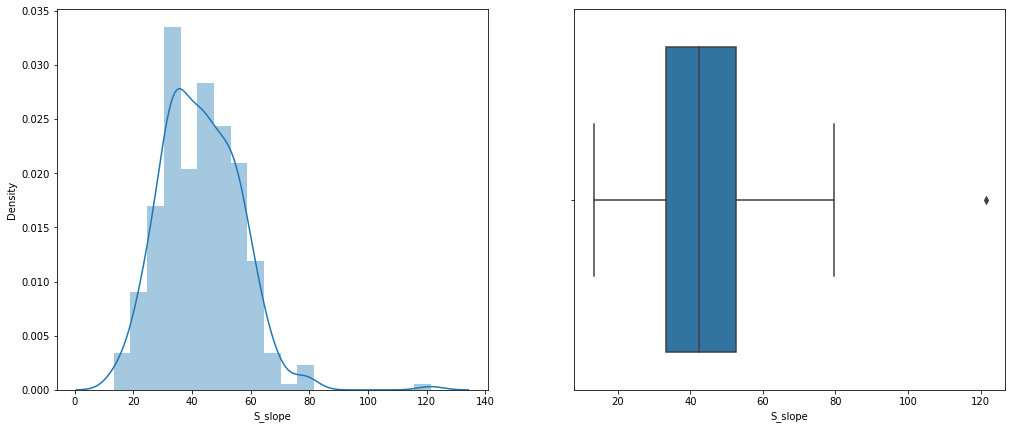

In [41]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_slope', data=df, ax=axes[1])
sns.distplot(df['S_slope'],  ax=axes[0])
plt.show()

Right skewness due to one outlier

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


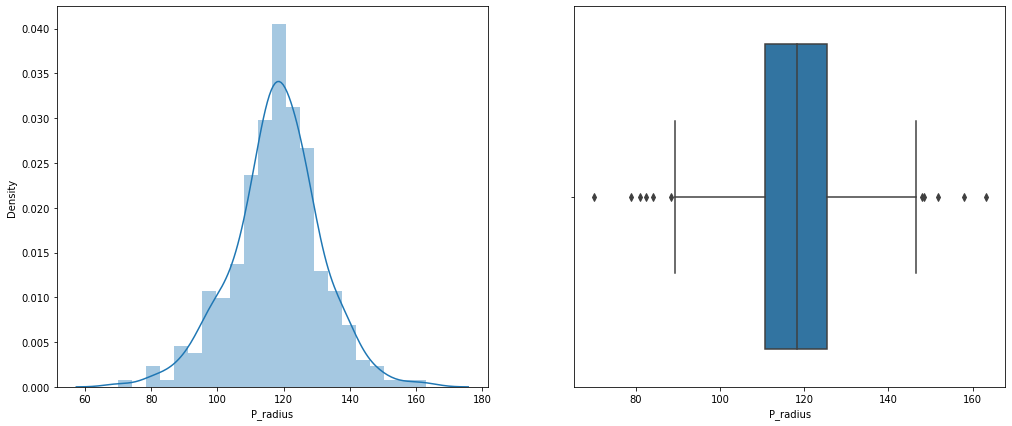

In [42]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_radius', data=df,ax=axes[1])
sns.distplot(df['P_radius'],  ax=axes[0])
plt.show()

Almost same number of outliers at both ends. Data look normally distributed.

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


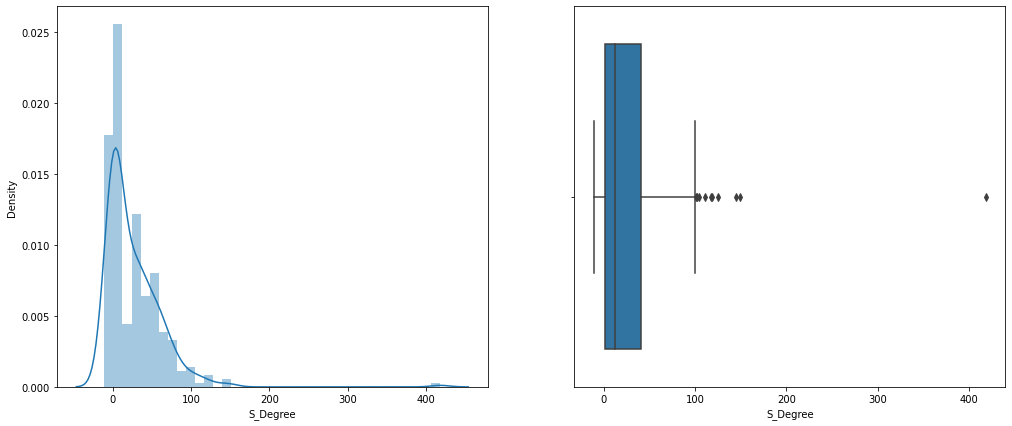

In [43]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_Degree', data=df,  ax=axes[1])
sns.distplot(df['S_Degree'],  ax=axes[0])
plt.show()

Data is totally right skewed and affected by outliers

c:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


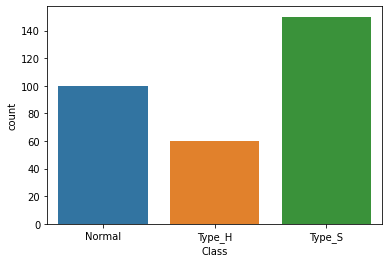

In [45]:
sns.countplot('Class',data=df)
plt.show()

Count of Type_S class is more than Normal and Type_H respectively

# Bivariate Analysis

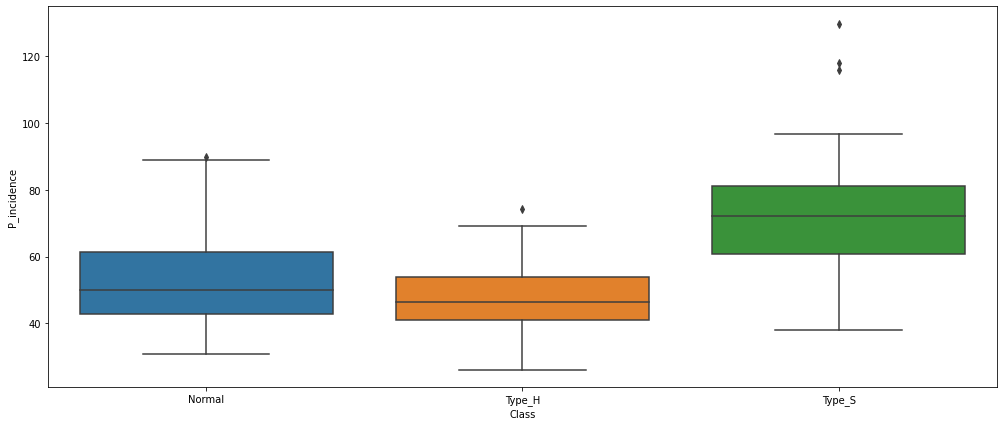

In [47]:
plt.figure(figsize=(17,7))
sns.boxplot(x='Class', y='P_incidence', data= df)
plt.show()

P_incidence is more for Type_S > Normal > Type_H

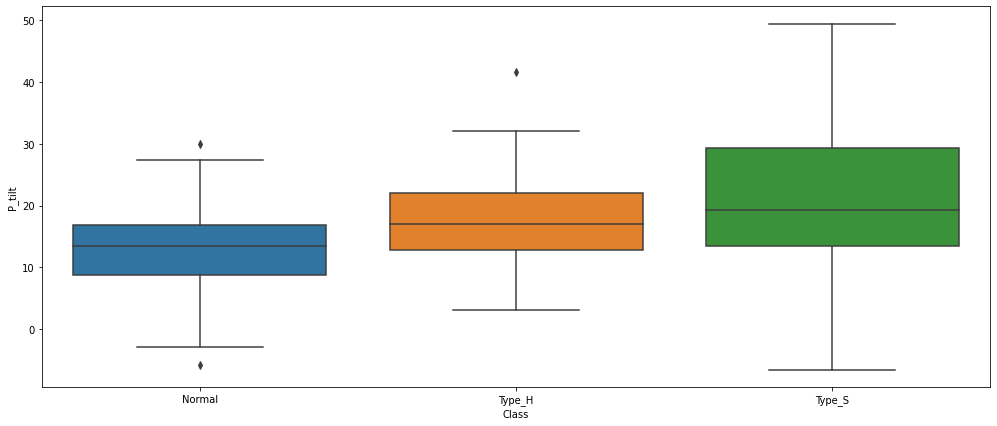

In [48]:
plt.figure(figsize=(17,7))
sns.boxplot(x='Class', y='P_tilt', data= df)
plt.show()

P_tilt is more for Type_S > Type_H > Normal

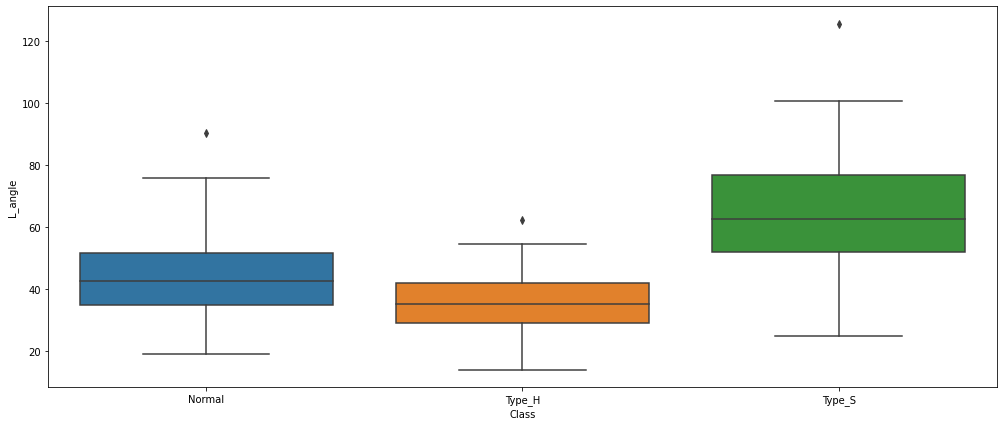

In [50]:
plt.figure(figsize=(17,7))
sns.boxplot(x='Class', y='L_angle', data= df)
plt.show()

L_angle is more for Type_S > Normal > Type_H

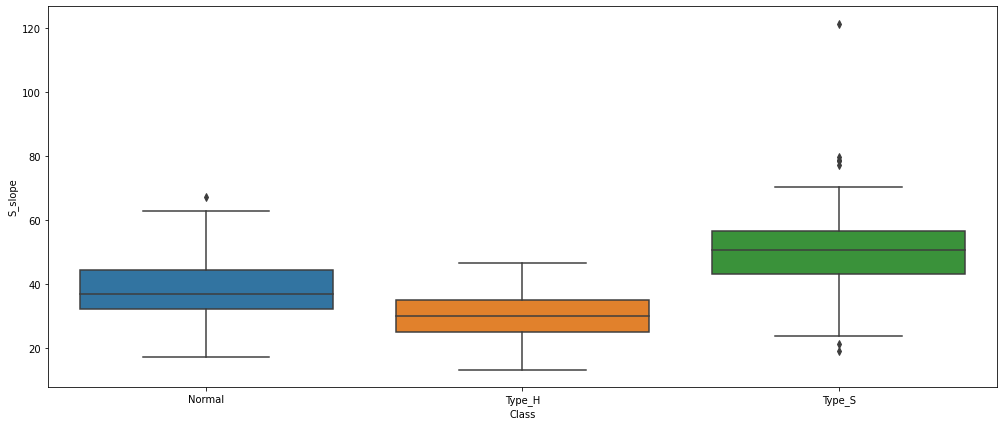

In [51]:
plt.figure(figsize=(17,7))
sns.boxplot(x='Class', y='S_slope', data= df)
plt.show()

S_slope is more for Type_S > Normal > Type_H

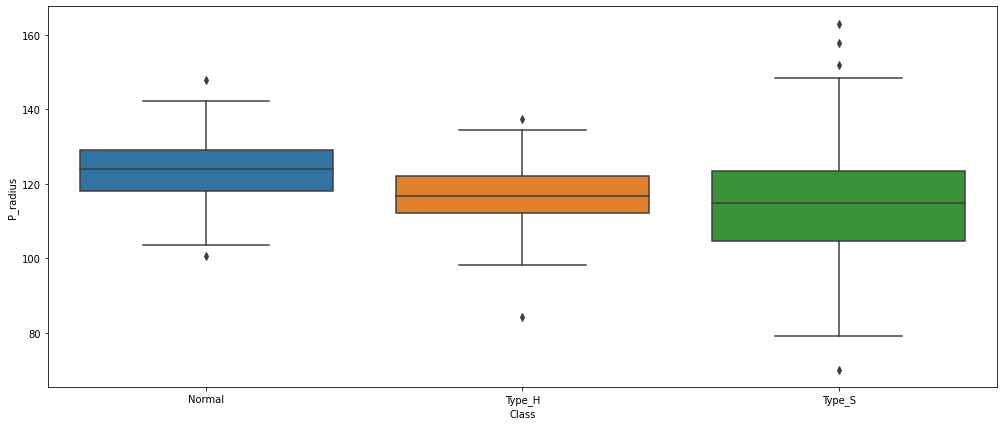

In [52]:
plt.figure(figsize=(17,7))
sns.boxplot(x='Class', y='P_radius', data= df)
plt.show()

P_radius is more for Normal > Type_H > Type_S

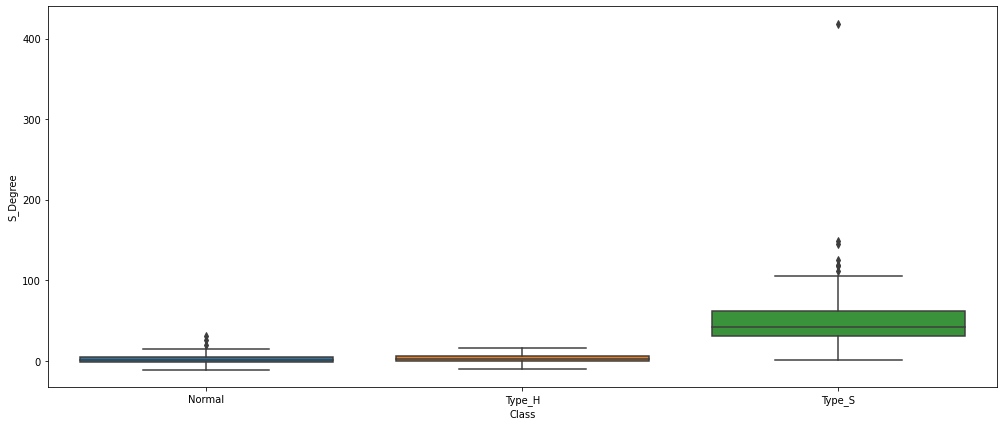

In [53]:
plt.figure(figsize=(17,7))
sns.boxplot(x='Class', y='S_Degree', data= df)
plt.show()

S_Degree has large values for Type_S comapred to Normal and Type_H values

# Multivariate Analysis

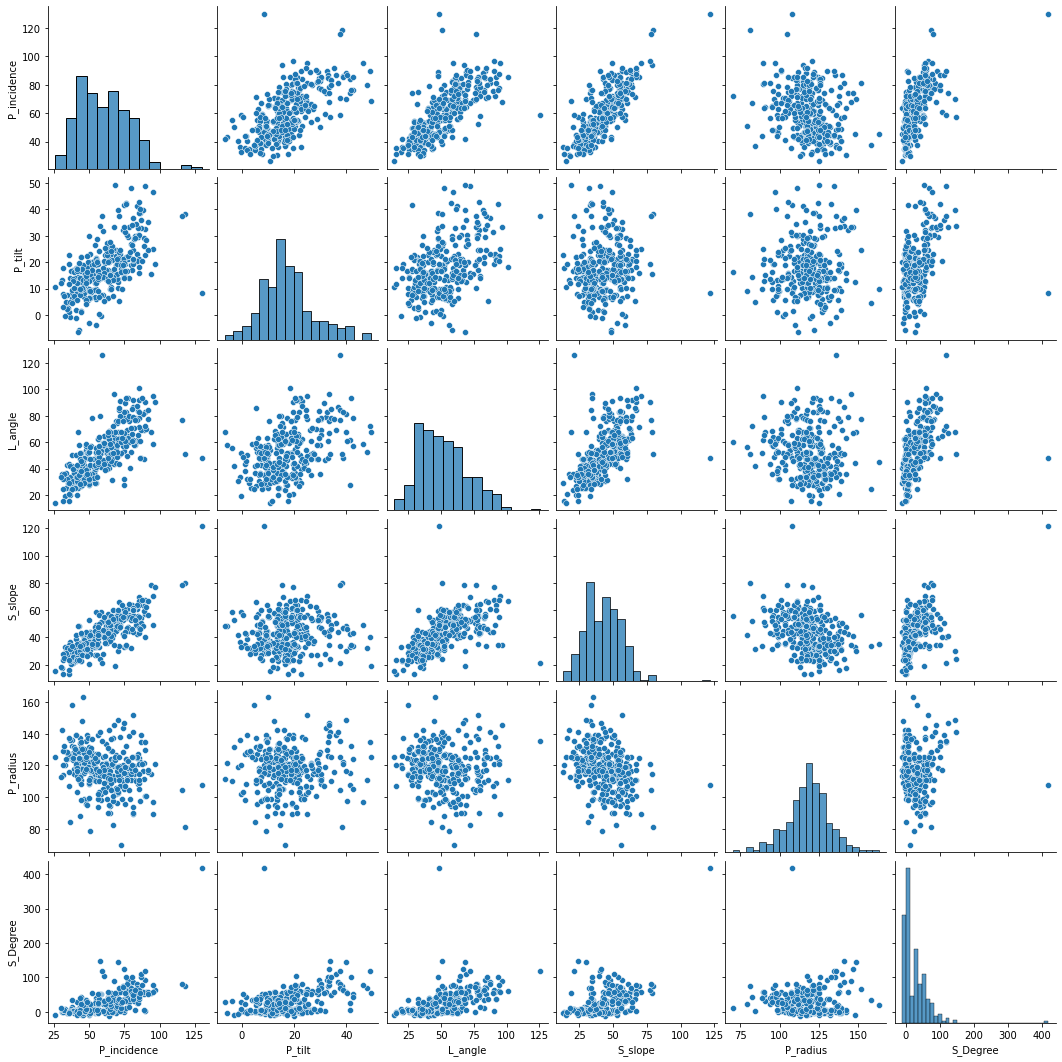

In [54]:
sns.pairplot(df)
plt.show()

P_incidence has postive distribution with all variables except P_radius and it is higher for S_slope and L_angle

P_tilt is not linearly distributed for most of the parameters.

L_angle has postive distributed with p_tilt,s_slope and s_degree. It has relation with P_radius.

s_slope has positive relation with L_angle and s_degree.

p_radius has no correlation with s_degree,p_tilt,l_angle.

S_degree is no correlation at all.

In [144]:
df.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
P_incidence,1.000000,0.462761,0.775380,0.770750,NaN,-0.078106,0.539166
P_tilt,0.462761,1.000000,0.366946,0.153876,NaN,0.024267,0.250225
L_angle,0.775380,0.366946,1.000000,0.678022,NaN,-0.123077,0.526940
S_slope,0.770750,0.153876,0.678022,1.000000,NaN,-0.161297,0.437746
P_radius,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S_Degree,-0.078106,0.024267,-0.123077,-0.161297,NaN,1.000000,-0.324378
Class,0.539166,0.250225,0.526940,0.437746,NaN,-0.324378,1.000000


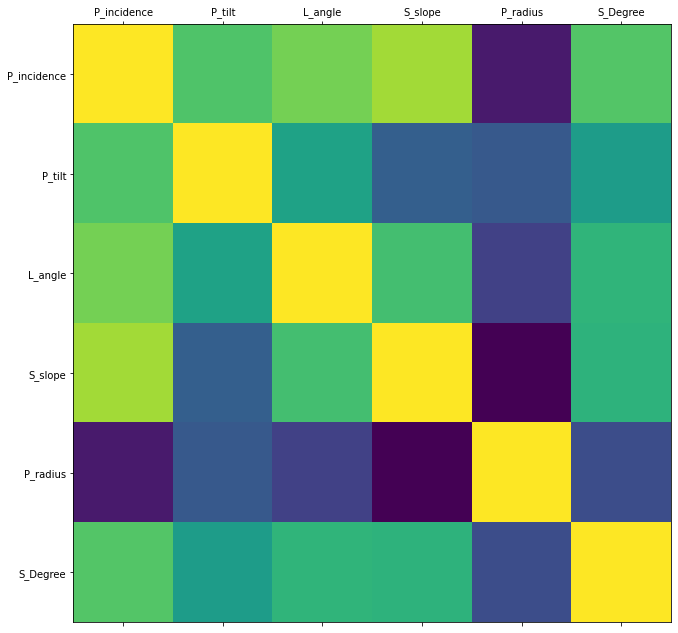

In [57]:
def plot_corr(dfnew, size=11):
    corr = dfnew.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

# 4. Data pre-processing:

As there are few outliers we have seen in the data analysis which can impact model training, testing and performance of the model. Lets find these outliers and replace it with mean of that corresponding column.

In [12]:
columns=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']

In [13]:
outliers = []
for c in columns:
    Q3 = np.percentile(df[c],75)
    Q1 = np.percentile(df[c],25)
    IQR = Q3 - Q1
    Threshold = IQR*1.5
    uf = Q3 + Threshold
    lf = Q1 - Threshold
    dfwoO = df.loc[(df[c] >= lf) & (df[c] <= uf)]
    mean= dfwoO[c].mean()
    df[c]=np.where(df[c]>uf,mean,df[c])
    df[c]=np.where(df[c]<lf,mean,df[c])
    #checking if there are any outliers remaining
    for i in df[c]:
        if i < lf or i > uf:
           outliers.append(i)
        
print(outliers)

[]


In [14]:
from sklearn.preprocessing import LabelEncoder
labels=LabelEncoder()
df['Class']=labels.fit_transform(df['Class'])
df['Class'].value_counts()

3    133
0     73
2     37
1     27
5     23
4     17
Name: Class, dtype: int64

c:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


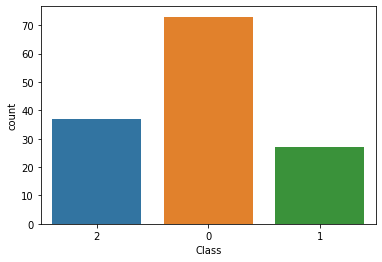

In [15]:
sns.countplot('Class',data=df,order=[2,0,1])
plt.show()

Seems classes are not equally distributed. Approximately half of the data belongs to Type_S and other half to class Normal and Type_H conbined. This can impact the accuracy of a model for test data. That is overfitting.

In [16]:
x=df.drop('Class', axis=1)
y=df['Class']

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit(x)
x_scaled = scaled.transform(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

In [19]:
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_test_norm = norm.transform(x_test)

# 5. Model training, testing and tuning

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' )
KNN.fit(x_train, y_train)
prediction = KNN.predict(x_test)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
31,46.390260,11.079047,32.136553,35.311213,98.774546,6.386832
134,72.643850,18.929117,68.000000,53.714733,116.963416,25.384247
28,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575
69,77.236898,16.737622,49.775534,60.499275,110.690377,39.787154
80,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211
...,...,...,...,...,...,...
69,48.801909,18.017762,52.000000,30.784147,139.150407,10.442862
21,53.911054,12.939318,39.000000,40.971736,118.193035,5.074353
91,48.030624,3.969815,58.344519,44.060809,125.350962,35.000078
78,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247


In [23]:

prediction = KNN.predict(x_test)
prediction[len(prediction)-1]

3

In [21]:
KNN.score(x_train, y_train)
#print('Accuracy on Test data:',KNN.score(X_test, y_test) )

0.7695852534562212

In [142]:
KNN.score(x_test, y_test)

0.6989247311827957

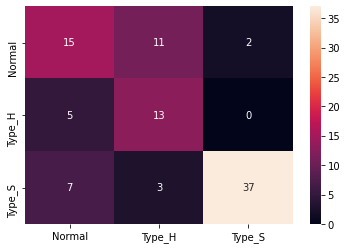

In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55        28
           1       0.48      0.72      0.58        18
           2       0.95      0.79      0.86        47

    accuracy                           0.70        93
   macro avg       0.66      0.68      0.66        93
weighted avg       0.74      0.70      0.71        93



0.97 precision for class 2: Type_S is better than other to classes because Type_S has more distribution. Recall and F1 score is also higher for Type_S due to skewed distribution of data.

In [129]:
training = []
testing = []
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(x_train, y_train)
    training.append(KNN.score(x_train, y_train))
    testing.append(KNN.score(x_test, y_test))

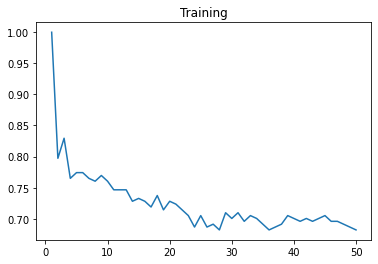

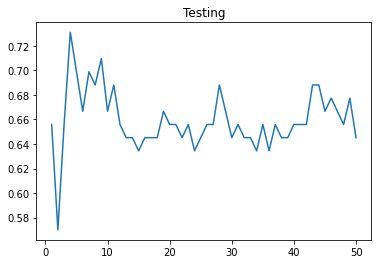

In [130]:
plt.plot(range(1,51),training)
plt.title('Training')
plt.show()
plt.plot(range(1,51),testing)
plt.title('Testing')
plt.show()

It seems between 4 to 15 we have few better values for accuracy

In [133]:
k=[4,6,7,8,9,10,11,12,13,14,15]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(x_train, y_train)
    prediction = KNN.predict(x_test)
    print('Accuracy on Training data for k = '+str(i)+' is '+str(KNN.score(x_train, y_train)))
    print('Accuracy on Test data for k = '+str(i)+' is '+str(KNN.score(x_test, y_test)))
    print('Classification report for k '+str(i)+' :\n',classification_report(y_test,prediction))

Accuracy on Training data for k = 4 is 0.7649769585253456
Accuracy on Test data for k = 4 is 0.7311827956989247
Classification report for k 4 :
               precision    recall  f1-score   support

           0       0.59      0.71      0.65        28
           1       0.54      0.72      0.62        18
           2       1.00      0.74      0.85        47

    accuracy                           0.73        93
   macro avg       0.71      0.73      0.71        93
weighted avg       0.79      0.73      0.75        93

Accuracy on Training data for k = 6 is 0.7741935483870968
Accuracy on Test data for k = 6 is 0.6666666666666666
Classification report for k 6 :
               precision    recall  f1-score   support

           0       0.48      0.57      0.52        28
           1       0.50      0.67      0.57        18
           2       0.94      0.72      0.82        47

    accuracy                           0.67        93
   macro avg       0.64      0.65      0.64        93
wei

### For value 4 for k we have balanced values for training and testing dataset.

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
LR=LogisticRegression()
GN=GaussianNB()
KNN_model=KNeighborsClassifier(n_neighbors=13)
SVC = SVC(kernel='linear',C=1,gamma=.6)

In [135]:
models = []
models.append(('LR', LR))
models.append(('NB', GN))
models.append(('KNN', KNN_model))
models.append(('SVC', SVC))

In [136]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=10,shuffle=True)
	cv = model_selection.cross_val_score(model,  x,y, cv=kfold, scoring=scoring)
	results.append(cv)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv.mean(), cv.std())
	print(msg)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

LR: 0.706452 (0.075583)
NB: 0.706452 (0.060263)
KNN: 0.687097 (0.067742)
SVC: 0.716129 (0.077419)


### It Logistic Regression, Naive Bayes and Support vector has similar accuracies but for Naive Bayes Standard deviation is also less. Therefore, Naive Bayes has better fit.

In [137]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=10,shuffle=True)
	cv = model_selection.cross_val_score(model,  x_scaled,y, cv=kfold, scoring=scoring)
	results.append(cv)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv.mean(), cv.std())
	print(msg)

LR: 0.693548 (0.052512)
NB: 0.709677 (0.064516)
KNN: 0.725806 (0.071041)
SVC: 0.696774 (0.061544)


### It Naive Bayes and KNN has similar accuracies for scaled data but for Naive Bayes Standard deviation is also less. Therefore, Naive Bayes has better fit.

# 6. Conclusion and improvisation:

None of the Dependent variables have correlation with Independent variable in range of -0.1 to 0.1

Data belongs to Type_S has more distribution than other two classes therefore getting better accuracy in training the models. Resulting this, overfitting is possible.

For KNN, k = 4 has better and balanced train and test data fit than other values of k.

In cross validation, it seems Naive Bayes model stood out in terms of Accuracy and Standard deviation.

Neither problem statement nor name of the variable explains the content of variable. Detailed description of variable content might help understanding the value of variables.